#**Types of graphs and their characteristics**

Before getting into Machine Learning in Graphs, it is important to understand graphs' properties and how you can leverage them into expressing the system you are willing to represent. Additionally, these properties will allow you to perform different models and extract analytics insight from your graph.

Here we will go describing different types of graphs, their characteristics, and real world application where we might find them

Let's get into graphs characteristics and properties!

**Libraries**

In order to have a better understanding of graphs and their properties, we are developing practical examples using the **library `networkx`**, you can easily install it in your local environment using 

`pip/pip3 install networkx`



In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

**Directed or undirected**

---



This property refers as to whether the edges connecting the graphs have an inherent direction in it.

In undirected the graphs, edges indicate a two-way relationship, and as such they can be traversed from either node to other connected.

In directed graphs, edges indicate a one-way direction. Meaning that they can only be traversed in an specific direction of the edge.

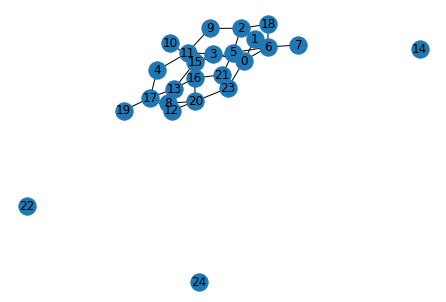

In [ ]:
#Initilize a random graph
g_gaussian = nx.gaussian_random_partition_graph(25, 4, 5, 0.25, 0.1, directed=False, seed=23)

#Plot the graph structure
nx.draw(g_gaussian, with_labels=True)

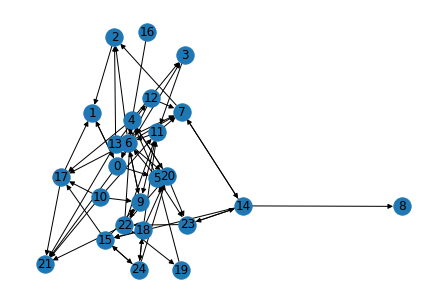

In [ ]:
#Initilize a random graph
g_gaussian_dir = nx.gaussian_random_partition_graph(25, 4, 5, 0.25, 0.1, directed=True, seed=23)

#Plot the graph structure
nx.draw(g_gaussian_dir, with_labels=True)

Knowing if a graph is directed can be described by the use of an arrow pointing the direction of the edge, if there is no arrow, then we can assume the graph is undirected. We can see this in the above NetworkX examples, where we create both an undirected and directed Random Gaussian Graph setting the ***directed parameter*** to True and False, respectively

This characteristic is significantly relevant in real-life scenarios. When creating graphs, we might have an Instagram (Social Network), where a user can follow another user but it doesn't have to be the other way around. This will be a ***directed graph***.

We may also have a Facebook (Social Network), where when a friend request is sent and accepted by any of the pair of users, they are instantly connected to each other. This could be described as an ***undirected graph***.

Note that with directed graphs is possible to get to dead-ends or infinite self-loops. There are graph-exploring strategies that deal with these particular scenarios - we will get into them in further posts

We can also see this, when extracting the edges of the graph with the edges() method, take a look:

In [ ]:
#Edges extraction - undirected graph
##Note that this method only represents the edges (x,y) where the x-index is lower than the y-index. 
##Nonetheless, the graph contemplates both directions

g_gaussian.edges()

EdgeView([(0, 1), (0, 3), (0, 5), (0, 6), (0, 23), (1, 2), (2, 5), (2, 9), (2, 18), (3, 11), (3, 15), (4, 11), (4, 17), (5, 6), (5, 15), (5, 21), (6, 7), (6, 18), (8, 13), (8, 17), (8, 20), (9, 11), (10, 15), (11, 16), (12, 13), (12, 17), (12, 20), (13, 16), (13, 15), (13, 17), (16, 15), (16, 20), (16, 21), (17, 19), (20, 23), (21, 23)])

In [ ]:
#Edges extraction - directed graph
g_gaussian_dir.edges()

OutEdgeView([(0, 1), (0, 3), (0, 5), (0, 21), (1, 0), (2, 1), (3, 11), (4, 3), (4, 17), (4, 20), (5, 4), (5, 6), (5, 23), (6, 2), (6, 7), (6, 9), (6, 17), (6, 20), (7, 2), (7, 14), (9, 6), (9, 22), (10, 9), (10, 11), (10, 17), (10, 21), (11, 6), (11, 7), (11, 9), (12, 0), (12, 7), (13, 2), (13, 7), (13, 12), (13, 21), (14, 7), (14, 8), (14, 15), (14, 23), (16, 6), (15, 9), (15, 17), (15, 24), (17, 1), (17, 21), (18, 11), (18, 15), (18, 20), (18, 24), (19, 5), (20, 4), (20, 23), (22, 4), (22, 11), (22, 19), (22, 20), (22, 21), (24, 15), (24, 18), (24, 20), (23, 14), (23, 22)])

This accesses the EdgeView for the undirected graphs where all edges are given as undirected. While, on the directed graph we can see that it defaults to the OutEdges of the graph, meaning that those tuples represent just a one-way path from one node to the other.

**Weighted and Unweighted**

---


Another property that graphs have is weighted relationships between nodes. This means that the relationship between two nodes is measured by a numerical value that indicates the magnitude of how strong, important or expensive the relationship is. In this way, weighted graphs present weights on all the edges, while an unweighted graph does not (in this case, all edges have the same importance).

We create a graph with 35 nodes and 50 random edges with the gnm_random_graph function, then we assign the properties 'weights' to the edges with a random probability. Addittionally, lets now assume that it is a social network, where each node is a person who has different connections with friends or family, if the weight is greater than 0.6 then there is a closer connection so they are family, but if the weight is less than 0.6 then the relationship is less strong and they are friends. 

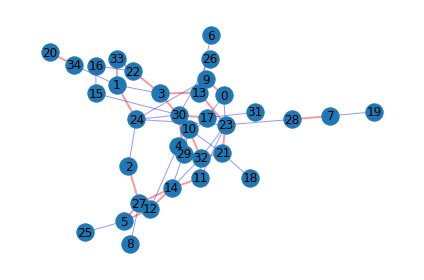

In [ ]:
#Inicialize a random graph
G=nx.gnm_random_graph(35, 50, seed=12)

#Assign a random weights
for (u, v) in G.edges():
    G.edges[u,v]['weight'] = random.random()

#Define type of relationship - Family have a higher importance than friends
family = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 0.6]
friend = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] < 0.6]

#Plot - Family relationship (red edge) - Friendship (blue edge)
pos = nx.spring_layout(G, seed=124)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(
    G, pos, edgelist=family, width=2, edge_color='r', alpha = 0.4
)
nx.draw_networkx_edges(
    G, pos, edgelist=friend, width=1, edge_color='b', alpha = 0.4
)

nx.draw_networkx_labels(G, pos)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

Although this is a simple example, in many real-world applications weighted edges are important to consider since not all relationships are equal. Furthermore, different graphs algorithms (stay tuned for this post) are affected. For example, in the shortest path algorithm, we use edge weights to determine the least expensive cost to arrive from node x to node y

**Sparse and Dense Graphs**

---



***The density of the graph refers to both*** ***the number of nodes and how connected they are***. In mathematics, a dense graph is one in which the number of edges is close to the maximal number of edges.
*The maximal number of edges are all the pair combination of nodes in an undirected graph and all the pair permutation of nodes in an undirected graph*.

In other words, the more close to fully connected the graph is - fully connected where every node is connected to each other-, the denser we can say the graph is. If the graph is a bunch of disjunct islands of nodes, we can safely say that is a sparse graph. 


**Let's see some NetworkX examples:**

We create the graphs using the generator method erdos_renyi_graph, this is a commonly used [model](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) to generate random graphs from two parameters: The number of nodes ***n***, and the probability to create an edge for every pair of nodes ***p***. 

Therefore, for the sparse graph we set up a low probability of 0.08, and for the dense graph we set up a probability of 0.15.


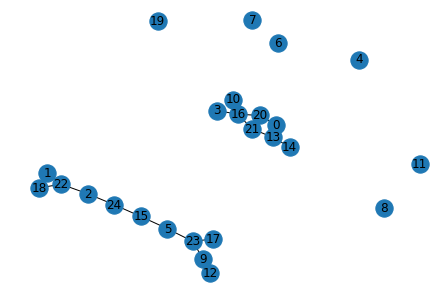

In [ ]:
#Initilize a random graph - n=25, p=0.08
g_sparse = nx.erdos_renyi_graph(25, 0.08,seed=23)

#Plot the graph structure
nx.draw(g_sparse, with_labels=True)

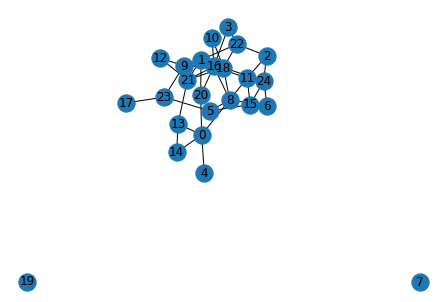

In [ ]:
#Initilize a random graph - n=25, p=0.15
g_dense = nx.erdos_renyi_graph(25, 0.15,seed=23)

#Plot the graph structure
nx.draw(g_dense, with_labels=True)

We can also measure the Density of the graph, as the ratio of the number of edges with respect to the maximal number of edges. Therefore we can use the following formulas for undirected and directed graphs:

**Undirected:**

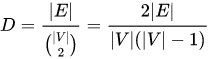

**Directed:**

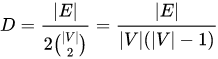

Now, let's measure the density of the previously created graphs! 

In [ ]:
n = 25
e_sparse = g_sparse.number_of_edges()
e_dense = g_dense.number_of_edges()

In [ ]:
def calculate_undirected_graph_density(n,e):
  return (2*e)/(n*(n-1))

In [ ]:
density_sparse = calculate_undirected_graph_density(n,e_sparse)
density_dense = calculate_undirected_graph_density(n,e_dense)

print("The density of the sparse graph is: ",round(density_sparse,2))
print("The density of the dense graph is: ",round(density_dense,2))

The density of the sparse graph is:  0.06
The density of the dense graph is:  0.14


In real-life, determining whether a graph is dense or sparse is quite subjective to the problem at hand. For example, we can use this metric to compare two different social networks and then compare one with each other in terms of density. Another highly used strategy to effectively measure the density of a given graph is via the comparison to multiple generated random graphs.

On the other hand, it is very common to have sparse graphs in real-life problems. Just think about being connected to every user on Facebook or following every account on Twitter; it would be impossible! Therefore, the sparse analysis could be useful on subgraphs of the principal graph, estimating the complexity of the algorithms, or defining the sparse matrix for graphs representation (which we will get into in the following post)

**Homogeneous and Heterogenous Graphs**

---





Last but definitely not least, we have Homogeneous and Heterogeneous Graphs. This distinction goes into the types of both the nodes and the edges in the graph. In cases where we have only one type of node and only one type of relationship, we are dealing with a **Homogeneous Graph**, any other type of node or edge added would then be a **Heterogeneous Graph**.

This is a really important distinction because those graphs are immensely different both in their complexity -where Homogeneous Graphs tend to be much simpler-, and in the Machine Learning methodologies we can use to deal with them that we will study in later posts.

**Lets get into a practical example!**

In this case, we construct a random graph with 25 nodes and a probability of 0.15 of having an edge between nodes. For our example, we consider a communication company where the graph considers calls between users. Particularly, the company wants to differentiate between new users (less than 12 months) and old users (more than 12 months) to understand if there are different behaviors between users.

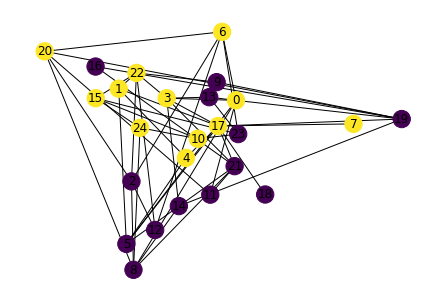

In [ ]:
#Inicialize a random graph
G=nx.erdos_renyi_graph(25, 0.15,seed=45)

#Assign type of node
for u in G.nodes():
    rand = random.randint(0, 48)
    G.nodes[u]['Type'] = 1 if rand < 12 else 0

color_val = [nx.get_node_attributes(G,'Type').get(node) for node in G.nodes()]
nx.draw(G, pos, with_labels=True, node_color = color_val)

As in our example, most real-life graphs are heterogeneous graphs where different entities interact. It is quite complicated to describe a process with only one type of entity interacting with other entities all of the same type, making Heterogeneous Graphs more challenging to deal with but also more expressive of the process they describe. 
However, there are different techniques to transform homogeneous graphs into heterogeneous graphs and vice versa. For example, think about a University network in which you have two types of nodes: students and classes. Intuitively you can think in linking the students with the classes, but after you obtain that graph you could eliminate the "classes" nodes and transform them into edges between students

It's also relevant to note that different types of nodes may have different characteristics or features. Think of a paper-author network, where we have author relationships between Author and Paper nodes and citation relationships where Paper nodes connect with each other if they have cited any other paper. In this type of example, we may have distinct feature sets between the Authors and the Papers, and as such we have to be more creative when dealing with those networks.


**Final thoughts**

---
In this post, we got into some of the most relevant graph properties that we can usually find. We can also combine these properties as we wish to create the extraction of reality that we are willing to express. In further posts, we are going to implement some first examples of Graphs ML. 

**Stay tuned!**


**Continue practice!**

---



Here are the available graphs prebuilt in networkx

**Karate club - heterogeneous graph**

Each node in the returned graph has a node attribute ‘club’ that indicates the name of the club to which the member represented by that node belongs, either ‘Mr. Hi’ or ‘Officer’.

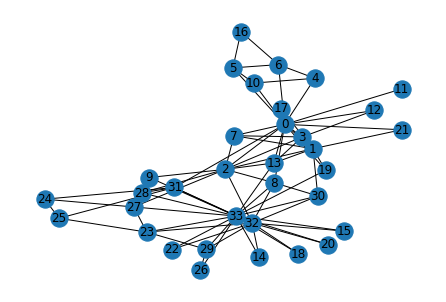

In [ ]:
g_karate = networkx.karate_club_graph()
nx.draw(g_karate, with_labels=True)


**Davis southern women**

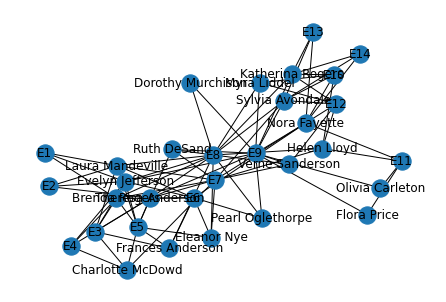

In [ ]:
g_davis = nx.davis_southern_women_graph()
nx.draw(g_davis, with_labels=True)

**Florentine families - bipartite graph**

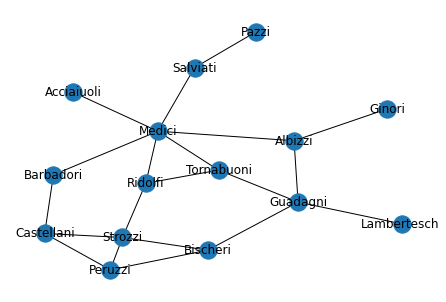

In [ ]:
g_florence = nx.florentine_families_graph()
nx.draw(g_florence, with_labels=True)

**Les miserables**

Returns coappearance network of characters in the novel Les Miserables.

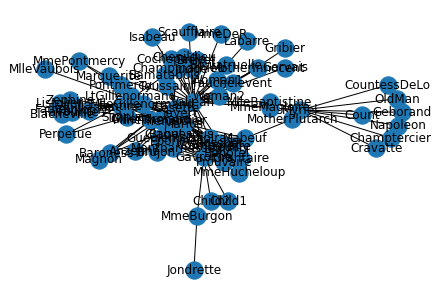

In [ ]:
g_mis = nx.les_miserables_graph()
nx.draw(g_mis, with_labels=True)

**Caveman**

This returns an undirected graph, it can be converted to a directed graph using nx.to_directed(), or a multigraph using nx.MultiGraph(nx.caveman_graph(l, k)). Only the undirected version is described in [1] and it is unclear which of the directed generalizations is most useful.



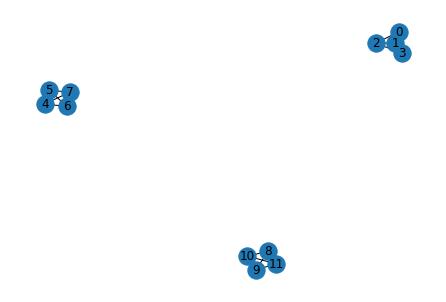

In [ ]:
g_cave = nx.caveman_graph(3,4)
nx.draw(g_cave, with_labels=True)

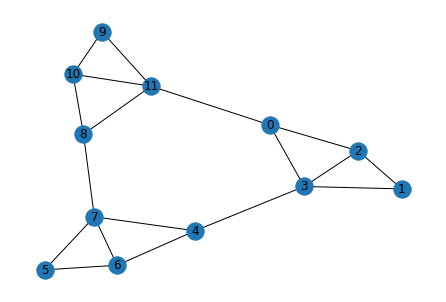

In [ ]:
g_concave = nx.connected_caveman_graph(3,4)
nx.draw(g_concave, with_labels=True)

**Random graph**

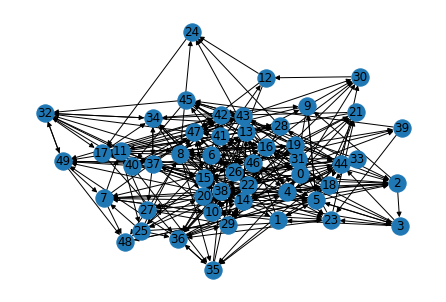

In [ ]:
g_gaussian = nx.gaussian_random_partition_graph(50, 7, 10, 0.25, 0.1, directed=True)
nx.draw(g_gaussian, with_labels=True)